In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rlway.osrd.infra as infr

In [3]:
from rlway.osrd.infra import read_json
infra = read_json('./infra.json')

In [4]:
infr.routes(infra)

['rt.buffer_stop.0->DA_out', 'rt.DA_out->DB_in', 'rt.DB_in->buffer_stop.1']

In [5]:
infr.route_limits(infra)

{'DA_out': ('T', 50.0),
 'DB_in': ('T', 9970.0),
 'buffer_stop.0': ('STA_Q1', 0.0),
 'buffer_stop.1': ('STB_Q1', 450.0)}

In [6]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [7]:
from rlway.schedules import Schedule, schedule_from_simulation

In [8]:
s = schedule_from_simulation(infra, res, simplify_route_names=False)
# s.draw_graph()

In [9]:
routes_switches = {
    route['id']: list(route['switches_directions'].keys())[0]
    for route in infra['routes']
    if len(list(route['switches_directions'].keys())) != 0
}
routes_switches

{}

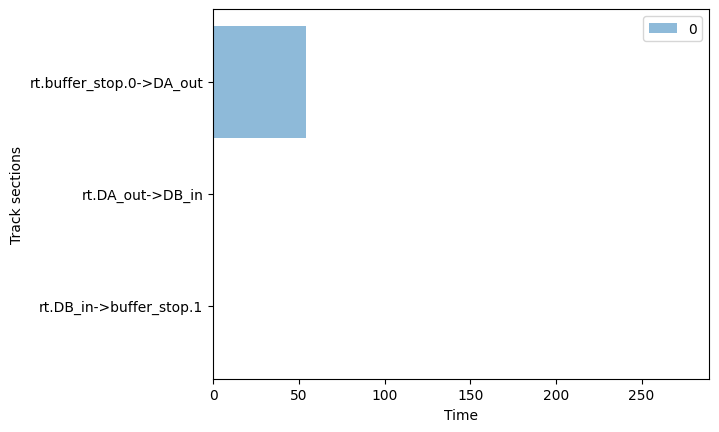

In [14]:
s.plot()

In [11]:
infr.draw_infra(infra)

In [12]:
infr.draw_infra(infra, remove_bufferstop_to_bufferstop=False)

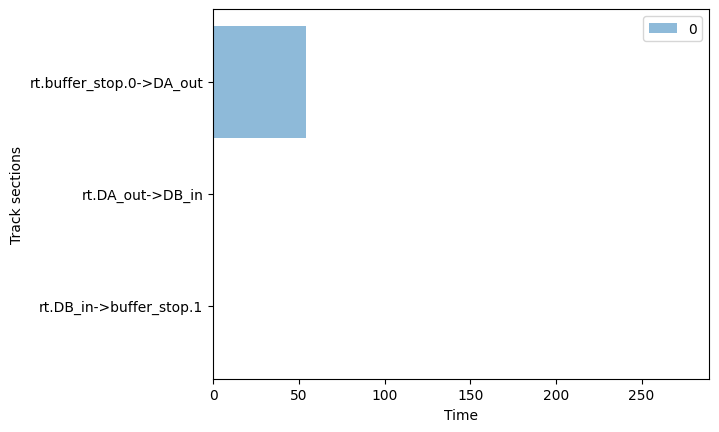

In [13]:
s.sort().plot()